## BIBLIOTHEQUE ET MODULE

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)

## TELECHARGEMENT DATA BASE et Premiere observation

In [3]:
CURRENT_DIRECTORY = os.getcwd()
folder = os.path.join(CURRENT_DIRECTORY, 'Data')

# Jeu de données 1

## EdStatsCountry - base de donnée des pays et code associées

In [4]:
nom_fichier = 'EdStatsCountry.csv'
fichier_source = os.path.join(folder, nom_fichier)
df_EdStatsCountry = pd.read_csv(fichier_source)
df_EdStatsCountry.shape

(241, 32)

In [5]:
df_EdStatsCountry.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,2007,NaN,Value added at producer prices (VAP),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1971–84,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS

In [6]:
df_EdStatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [7]:
#creation d'une copy de la data frame avant d'effectuer les transformations
df_EdStatsCountry_M = df_EdStatsCountry.copy()

In [8]:
#suppression de la colonne "Unnamed: 31"
df_EdStatsCountry_M.drop("Unnamed: 31", axis=1, inplace= True)

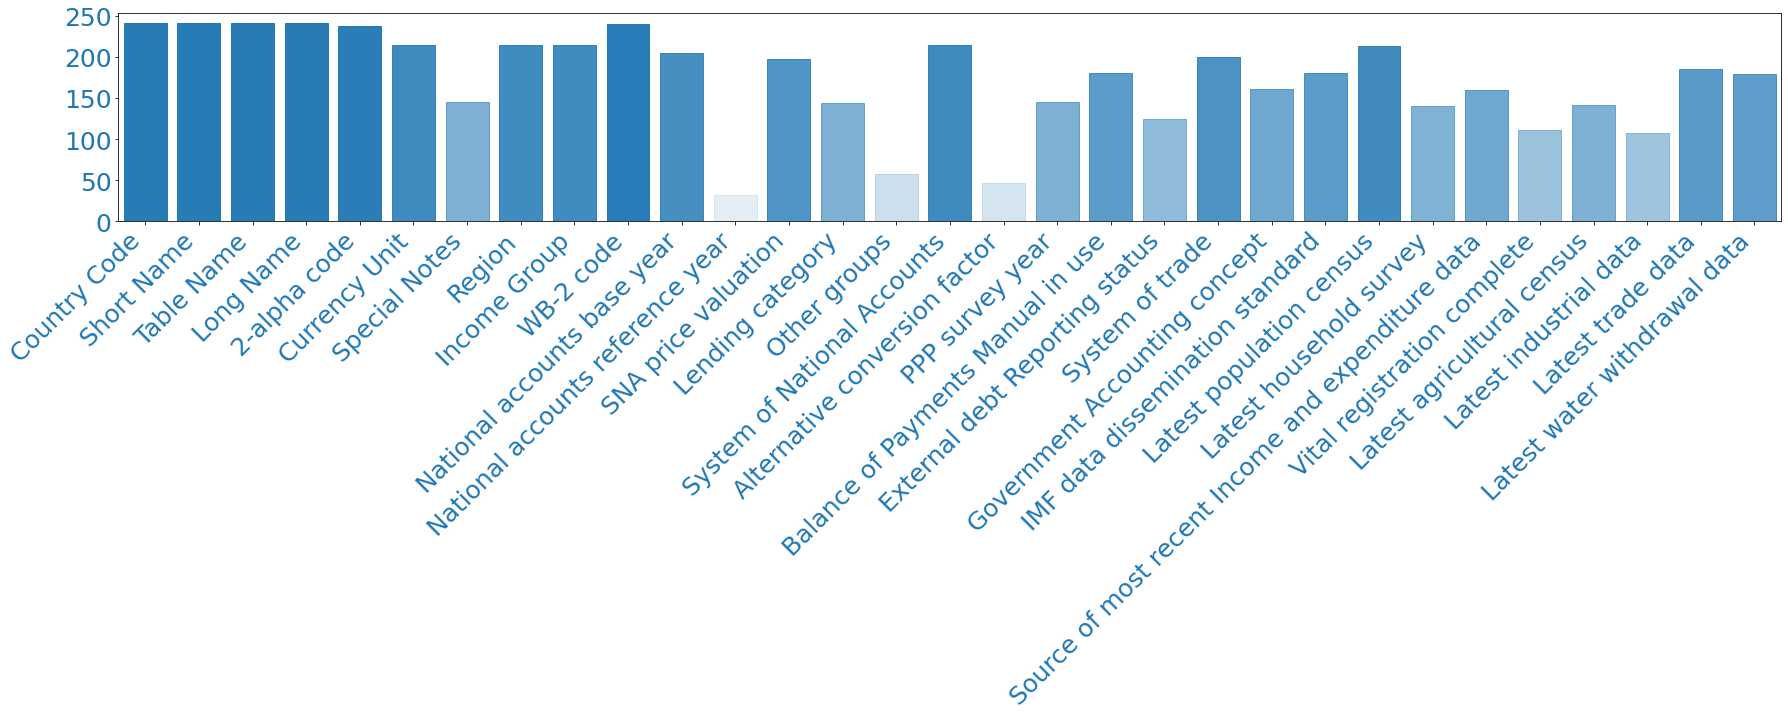

In [9]:
#graphique representant les missing data

data = pd.DataFrame(data = np.array([df_EdStatsCountry_M.notna().sum().values]), columns = df_EdStatsCountry_M.columns.values)

#sns.palplot (sns.color_palette ("Blues", 2))
#colormap = sns.color_palette("Blues") 
#print(colormap)

fig, ax = plt.subplots(1,1, figsize=(25,10))


g = sns.barplot(data = data, palette = 'Blues', saturation = 1)
for bar in ax.patches:
    bar.set_color(c = 'tab:blue')
    alpha_bar = bar.get_height()/250
    bar.set_alpha(alpha_bar)i
    
for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(25)
    label.set_horizontalalignment('right')

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(25)
    
"""for line in ax.yaxis.get_ticklines():
    # line is a Line2D instance
    label.set_color('tab:blue')
    line.set_color('tab:blue')
    line.set_markersize(25)
    line.set_markeredgewidth(3)"""
    
#fig.suptitle("MISSING DATA", size = 20)    
#g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment ='right' )

graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_EdStatsCountry.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


### UNICITE DES PAYS

In [10]:
df_EdStatsCountry_M['Country Code'].nunique()

241

In [11]:
#uniformisation textuelle:
for col in ['Short Name', 'Long Name']:
    df_EdStatsCountry_M['Country Code'].apply(lambda x : x.strip())

###  REGION ET INCOME GROUP

In [12]:
#INCOME GROUP
df_EdStatsCountry_M['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [13]:
df_EdStatsCountry_M['Income Group'] = df_EdStatsCountry_M['Income Group'].replace('High income: nonOECD','High income')
df_EdStatsCountry_M['Income Group'] = df_EdStatsCountry_M['Income Group'].replace('High income: OECD','High income')

In [14]:
df_EdStatsCountry_M['Income Group'].unique()

array(['High income', 'Low income', 'Upper middle income', nan,
       'Lower middle income'], dtype=object)

In [15]:
#REGION
df_EdStatsCountry_M['Region'].nunique()

7

In [16]:
df_EdStatsCountry_M['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [17]:
cond = df_EdStatsCountry_M['Income Group'].isna()
df_EdStatsCountry_M[cond]['Short Name']

5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

In [19]:
cond = df_EdStatsCountry_M['Region'].isna()
df_EdStatsCountry_M[cond]['Short Name']

5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

In [20]:
len(df_EdStatsCountry_M[cond])

27

In [21]:
#Creation de liste:
liste_region = ['East Asia & Pacific (all income levels)','Europe & Central Asia (all income levels)',
                'Latin America & Caribbean (all income levels)', 
                'Gibraltar','Middle East & North Africa (all income levels)',
                'North America','Nauru', 'South Asia', 'Sub-Saharan Africa (all income levels)', 'World']

liste_economique= ['High income', 'Heavily indebted poor countries (HIPC)',
                   'Least developed countries: UN classification', 'Low income','Lower middle income',
                   'Low & middle income', 'Middle income', 'Upper middle income']

liste_politique=['Arab World', 'Euro area', 'European Union','OECD members' ]

liste_mixte_rep = ['East Asia & Pacific (developing only)','Latin America & Caribbean (developing only)',
                   'Europe & Central Asia (developing only)','Middle East & North Africa (developing only)',
                   'Sub-Saharan Africa (developing only)']

liste_agregation = liste_region + liste_economique + liste_politique + liste_mixte_rep
len(liste_agregation)

27

In [22]:
%%time
df_EdStatsCountry_M['Agregat'] = df_EdStatsCountry_M['Short Name'].apply(
    lambda x: 1 if x in liste_agregation else 0)

CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 1.48 ms


In [23]:
%%time
df_EdStatsCountry_M['Agregat'] = df_EdStatsCountry_M['Short Name'].apply(
lambda x: 1 if any(i in x for i in liste_agregation) else 0)

CPU times: user 3.31 ms, sys: 0 ns, total: 3.31 ms
Wall time: 3 ms


In [24]:
%%time
df_EdStatsCountry_M['Agregat'] = [1 if x in liste_agregation else 0 for x in df_EdStatsCountry_M['Short Name']]

CPU times: user 1.41 ms, sys: 0 ns, total: 1.41 ms
Wall time: 1.23 ms


In [25]:
cond = df_EdStatsCountry_M['Agregat'] == 1
len(df_EdStatsCountry_M[cond]['Short Name'])

27

In [124]:
cond = df_EdStatsCountry_M['Agregat']==1
data = np.array([df_EdStatsCountry_M[cond].notna().sum(axis = 1).values])
columns = df_EdStatsCountry_M['Long Name'][cond].values
df_agregat = pd.DataFrame(data= data , columns = columns)
df_agregat

,Arab World,East Asia & Pacific (developing only),East Asia & Pacific (all income levels),Europe & Central Asia (developing only),Europe & Central Asia (all income levels),Euro area,European Union,Gibraltar,High income,Heavily indebted poor countries (HIPC),Latin America & Caribbean (developing only),Latin America & Caribbean (all income levels),Least developed countries: UN classification,Low income,Lower middle income,Low & middle income,Middle East & North Africa (all income levels),Middle income,Middle East & North Africa (developing only),North America,Nauru,OECD members,South Asia,Sub-Saharan Africa (developing only),Sub-Saharan Africa (all income levels),Upper middle income,World
0,8,8,8,8,8,8,8,10,8,8,8,8,8,8,8,8,8,8,8,8,7,8,8,8,8,8,8


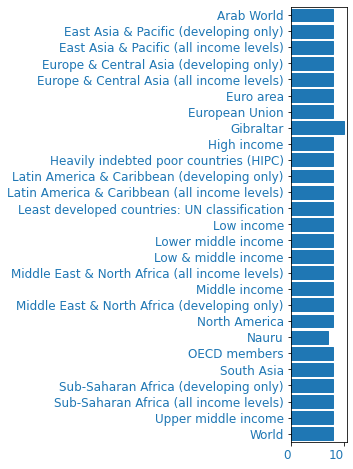

In [125]:
fig = plt.figure(figsize = (1,8))
ax = fig.add_subplot(1,1,1)

g = sns.barplot(data = df_agregat, orient ='h')

for bar in ax.patches:
    bar.set_color('tab:blue')
    #alpha = bar.get_height()/20
    #bar.set_alpha(alpha)
    
for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    #label.set_rotation(45)
    label.set_fontsize(12)
    label.set_horizontalalignment('right')

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(12)
    
graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Agregat_observation.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

### Latest population census

In [26]:
df_EdStatsCountry_M['Latest population census'].nunique()

27

In [27]:
df_EdStatsCountry_M['Latest population census'].unique()

array(['2010', '1979', '1970', '2011',
       '2011. Population figures compiled from administrative registers.',
       nan, '2009', '2008', '2013', '2006', '2012', '2005', '2003',
       'Guernsey: 2009; Jersey: 2011.', '1998', '1984', '2007',
       '2006. Rolling census based on continuous sample survey.', '2002',
       '1996',
       '2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.',
       '1997', '2004', '1993', '1983', '1987', '2001', '1989'],
      dtype=object)

In [28]:
#on regarde les pays qui n'ont pas recensement indiquée
cond1 = df_EdStatsCountry_M['Latest population census'].isna()
cond2 = df_EdStatsCountry_M['Agregat'] == 0
df_EdStatsCountry_M[cond1 & cond2]['Short Name'].nunique()

2

In [29]:
for pays in df_EdStatsCountry_M[cond1&cond2]['Short Name'].unique():
    print(pays)

Curaçao
St. Martin (French part)


/home/bryan/OpenClassRoom/Projet_SysEducatif/Graphique/Agregats_champs.jpg


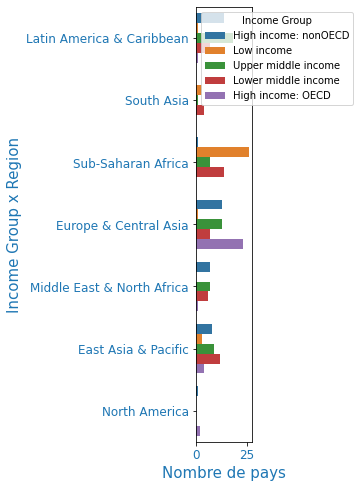

In [31]:
fig, ax = plt.subplots(1,1,figsize=(1,8))

data = df_EdStatsCountry

g = sns.countplot(data = data, y='Region', hue = 'Income Group', orient= 'v',ax = ax)

ax.set_xlabel('Nombre de pays', size = 15, color ='tab:blue')
ax.set_ylabel('Income Group x Region', size = 15, color ='tab:blue')

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(12)

for label in ax.yaxis.get_ticklabels():
    label.set_color('tab:blue')
    label.set_fontsize(12)
    
graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Agregats_champs.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.show()

# Jeu de données 2

## EdStatsCountry-Series.csv - Series Code et country code

In [32]:
nom_fichier = 'EdStatsCountry-Series.csv'
fichier_source = os.path.join(folder, nom_fichier)
df_EdStatsCountrySeries = pd.read_csv(fichier_source)
df_EdStatsCountrySeries.shape

(613, 4)

In [33]:
df_EdStatsCountrySeries.head(10)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
5,AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
6,AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
7,AFG,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
8,AFG,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
9,AFG,NY.GNP.PCAP.PP.CD,Estimates are based on regression.,NaN


In [35]:
%%capture cap --no-stderr

df_EdStatsCountrySeries.info()

graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'EdStatsCountrySeries_info.txt')

with open(path_complet, 'w') as f:
    f.write(cap.stdout)

In [36]:
df_EdStatsCountrySeries_M = df_EdStatsCountrySeries.copy()

In [37]:
df_EdStatsCountrySeries_M.drop('Unnamed: 3', axis = 1, inplace = True)

In [38]:
df_EdStatsCountrySeries_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


### COUNTRY CODE

In [39]:
df_EdStatsCountrySeries_M['CountryCode'].nunique()

211

In [40]:
#On compare avec la data base précedente (sans les observations agregées)
liste_code_pays_manquant = []
cond = df_EdStatsCountry_M['Agregat'] == 0
for code in df_EdStatsCountry_M[cond]['Country Code'].unique():
    if code not in df_EdStatsCountrySeries_M['CountryCode'].unique():
        liste_code_pays_manquant.append(code)
        
print("nombre de pays manquant = ",len(liste_code_pays_manquant), "\n",liste_code_pays_manquant)

nombre de pays manquant =  4 
 ['CUW', 'MAF', 'SSD', 'SXM']


In [41]:
liste_pays_manquant = []
for pays in liste_code_pays_manquant:
    cond = df_EdStatsCountry_M['Country Code'] == pays
    liste_pays_manquant.append(df_EdStatsCountry_M[cond]['Short Name'].values[0])
liste_pays_manquant

['Curaçao',
 'St. Martin (French part)',
 'South Sudan',
 'Sint Maarten (Dutch part)']

### SeriesCode

In [42]:
df_EdStatsCountrySeries_M['SeriesCode'].nunique()

21

In [43]:
df_EdStatsCountrySeries_M['SeriesCode'].unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

In [44]:
SeriesCode_by = df_EdStatsCountrySeries_M.groupby('SeriesCode').count().sort_values(by = 'CountryCode', ascending = False)
SeriesCode_by

,CountryCode,DESCRIPTION
SeriesCode,,
SP.POP.TOTL,211,211
SP.POP.GROW,211,211
NY.GDP.PCAP.PP.CD,19,19
NY.GDP.PCAP.PP.KD,19,19
NY.GNP.PCAP.PP.CD,19,19
NY.GDP.MKTP.PP.CD,14,14
NY.GNP.MKTP.PP.CD,14,14
NY.GDP.MKTP.PP.KD,14,14
SP.POP.0014.TO.ZS,13,13


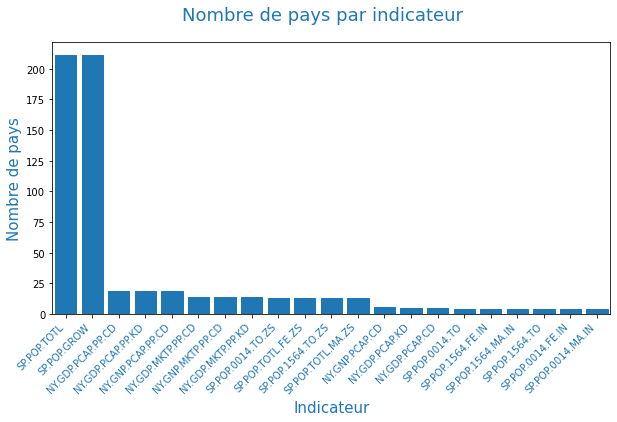

In [134]:
data = np.array([SeriesCode_by['CountryCode'].values])
columns = SeriesCode_by.index
df_temp = pd.DataFrame(data =data, columns =columns)

fig, ax = plt.subplots(1,1,figsize=(10,5))

g = sns.barplot(data = df_temp)

for bar in ax.patches:
    bar.set_color(c = 'tab:blue')
    
for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(10)
    label.set_horizontalalignment('right')

ax.set_xlabel('Indicateur', size = 15, color ='tab:blue')
ax.set_ylabel('Nombre de pays', size = 15, color ='tab:blue')
fig.suptitle('Nombre de pays par indicateur', size = 18, color ='tab:blue')

graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Seriescode par par pays.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.show()

In [46]:
#on regarde si tous les series sont presentent pour les pays
Country_code_by = df_EdStatsCountrySeries_M.groupby('CountryCode').count().sort_values(by = 'SeriesCode', ascending = False)
Country_code_by

,SeriesCode,DESCRIPTION
CountryCode,,
MDA,18,18
GEO,18,18
CYP,12,12
SRB,12,12
MUS,12,12
...,...,...
GRL,2,2
GTM,2,2
GUM,2,2


In [47]:
Country_code_by.T

CountryCode,MDA,GEO,CYP,SRB,MUS,TZA,MAR,SYR,ERI,GUY,SMR,SOM,TKM,TLS,PRI,AFG,ARG,XKX,UZB,LBY,LBN,FRA,PSE,CHI,MYS,...,HRV,EGY,HND,ESP,EST,ETH,FIN,FJI,FRO,FSM,GAB,GBR,GHA,GIB,GIN,GMB,GNB,GNQ,GRC,GRD,GRL,GTM,GUM,HKG,ZWE
SeriesCode,18,18,12,12,12,12,12,8,8,8,8,8,8,8,8,8,8,8,8,8,8,6,6,6,6,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
DESCRIPTION,18,18,12,12,12,12,12,8,8,8,8,8,8,8,8,8,8,8,8,8,8,6,6,6,6,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


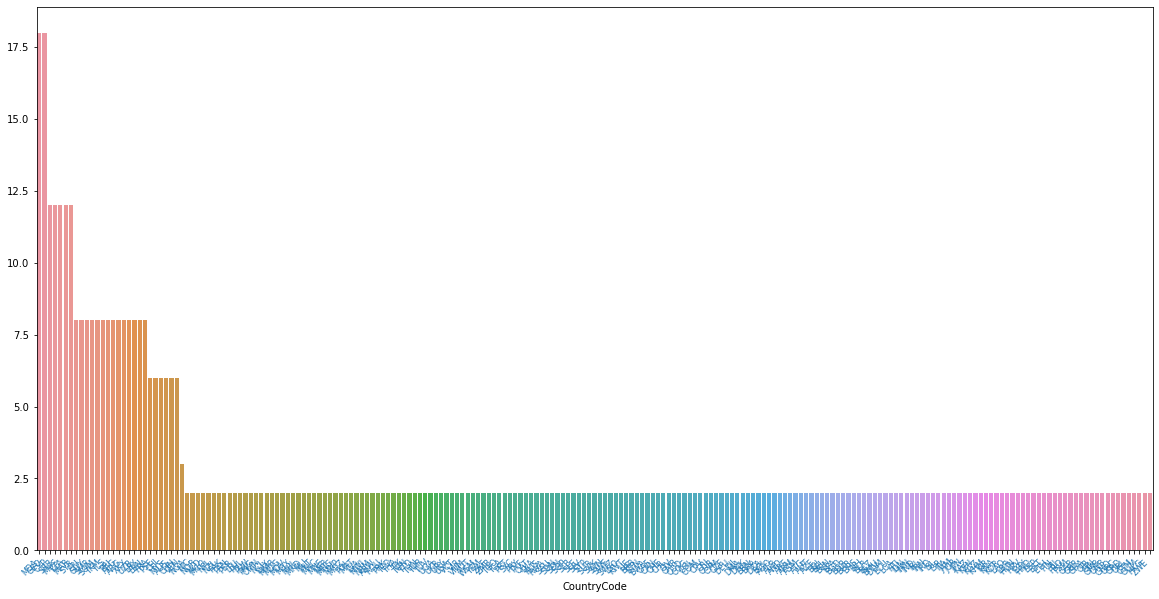

In [48]:
data = np.array([Country_code_by['SeriesCode'].values])
columns = Country_code_by.index
df_temp = pd.DataFrame(data= data , columns = columns)

fig, ax = plt.subplots(1,1, figsize=(20,10))
g = sns.barplot(data = df_temp)

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')
    
plt.show()

In [49]:
df_temp

CountryCode,MDA,GEO,CYP,SRB,MUS,TZA,MAR,SYR,ERI,GUY,SMR,SOM,TKM,TLS,PRI,AFG,ARG,XKX,UZB,LBY,LBN,FRA,PSE,CHI,MYS,...,HRV,EGY,HND,ESP,EST,ETH,FIN,FJI,FRO,FSM,GAB,GBR,GHA,GIB,GIN,GMB,GNB,GNQ,GRC,GRD,GRL,GTM,GUM,HKG,ZWE
0,18,18,12,12,12,12,12,8,8,8,8,8,8,8,8,8,8,8,8,8,8,6,6,6,6,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


### DESCRIPTION

In [50]:
 df_EdStatsCountrySeries['DESCRIPTION'].nunique()

97

In [51]:
 df_EdStatsCountrySeries['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

# Jeu de données 3

## EdStatsSeries.csv - les types de données numériques accessibles et les codes associées

In [56]:
nom_fichier = 'EdStatsSeries.csv'
fichier_source = os.path.join(folder, nom_fichier)
df_EdStatsSeries = pd.read_csv(fichier_source)
df_EdStatsSeries.shape

(3665, 21)

In [57]:
df_EdStatsSeries.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_EdStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

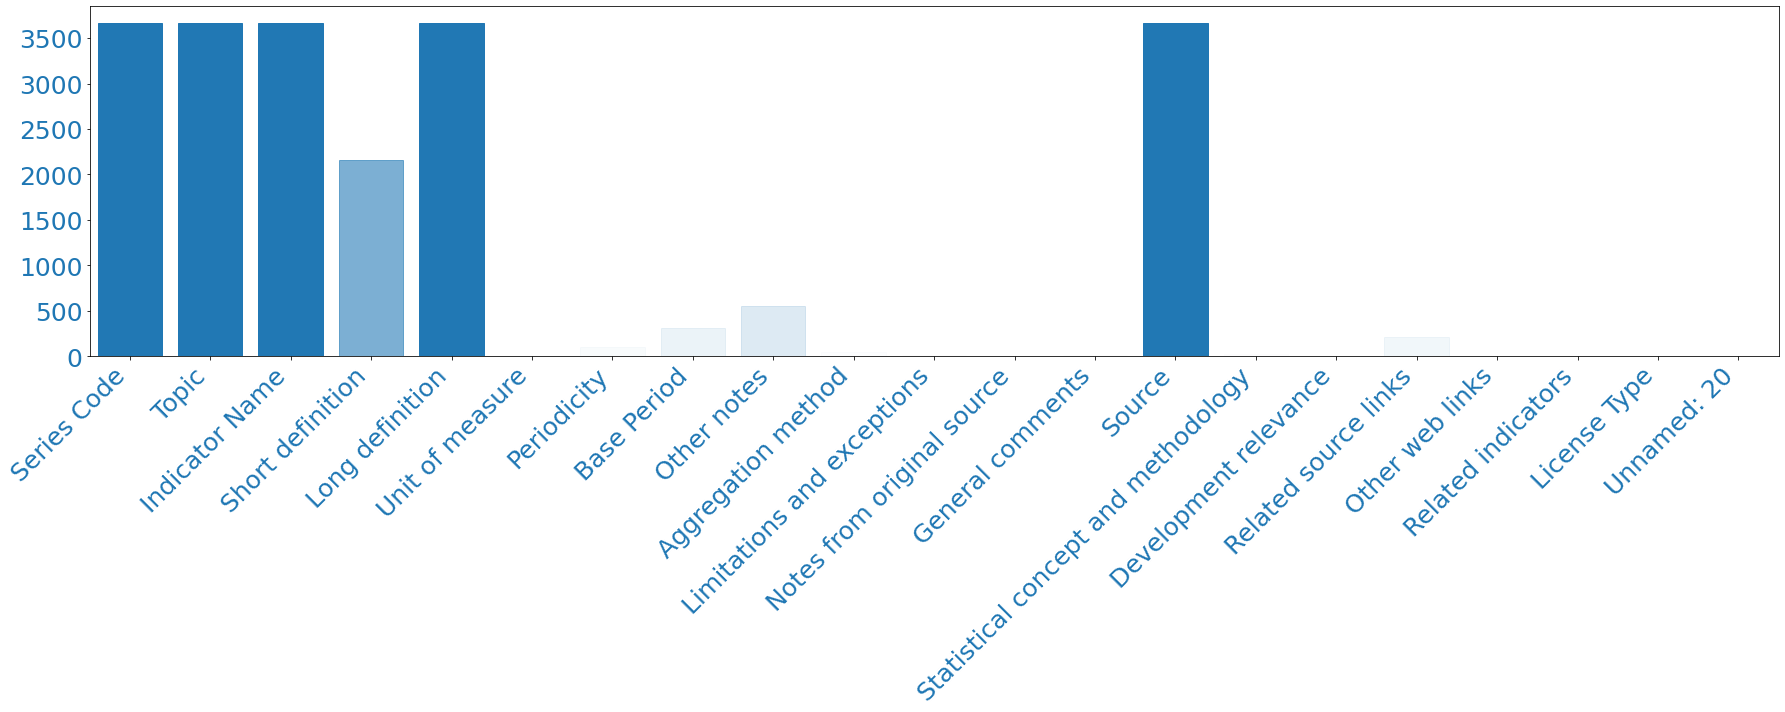

In [59]:

data = pd.DataFrame(data = np.array([df_EdStatsSeries.notna().sum().values]),columns = df_EdStatsSeries.columns.values)


fig, ax = plt.subplots(1,1, figsize=(25,10))

g = sns.barplot(data = data)
for bar in ax.patches:
    bar.set_color(c = 'tab:blue')
    alpha = bar.get_height()/3700
    bar.set_alpha(alpha =alpha)

g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment ='right' )

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(25)
    label.set_horizontalalignment('right')

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(25)

graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_EdStatsSeries.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [60]:
data

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,3665,3665,3665,2156,3665,0,99,314,552,47,14,0,14,3665,23,3,215,0,0,0,0


In [61]:
#Creation d'une copy
df_EdStatsSeries_M = df_EdStatsSeries.copy()

In [62]:
#suppression des colonnes qui ne sont pas assez renseignées
df_EdStatsSeries_M.drop(df_EdStatsSeries_M.columns[5:], axis = 1, inplace = True)

In [63]:
df_EdStatsSeries_M

,Series Code,Topic,Indicator Name,Short definition,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...
...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)..."
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)..."
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)..."
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go..."


### Series Code

In [64]:
df_EdStatsSeries['Series Code'].nunique()

3665

In [65]:
for code in df_EdStatsCountrySeries_M['SeriesCode'].unique():
    print(df_EdStatsSeries_M['Indicator Name'][df_EdStatsSeries_M['Series Code']==code].values)

['Population, total']
['Population growth (annual %)']
['GDP per capita, PPP (current international $)']
['GDP, PPP (constant 2011 international $)']
['GNI, PPP (current international $)']
['GDP, PPP (current international $)']
['GDP per capita, PPP (constant 2011 international $)']
['GNI per capita, PPP (current international $)']
['Population ages 15-64 (% of total)']
['Population, male (% of total)']
['Population, female (% of total)']
['Population ages 0-14 (% of total)']
['GNI per capita, Atlas method (current US$)']
['GDP per capita (current US$)']
['GDP per capita (constant 2010 US$)']
['Population ages 15-64, male']
['Population ages 0-14, total']
['Population ages 15-64, total']
['Population ages 15-64, female']
['Population ages 0-14, male']
['Population ages 0-14, female']


## Observation des differents indicateurs.

### Topic

In [66]:
df_EdStatsSeries_M['Topic'].nunique()

37

In [67]:
df_EdStatsSeries_M['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [68]:
#on regarde combien de series sont presente pour chaque catégorie

In [69]:
Topic_by = df_EdStatsSeries_M.groupby('Topic').count().sort_values(by ='Series Code',ascending= False)
Topic_by

,Series Code,Indicator Name,Short definition,Long definition
Topic,,,,
Learning Outcomes,1046,1046,1001,1046
Attainment,733,733,400,733
Education Equality,426,426,361,426
Secondary,256,256,0,256
Primary,248,248,0,248
Population,213,213,128,213
Tertiary,158,158,0,158
Teachers,137,137,16,137
Expenditures,93,93,31,93


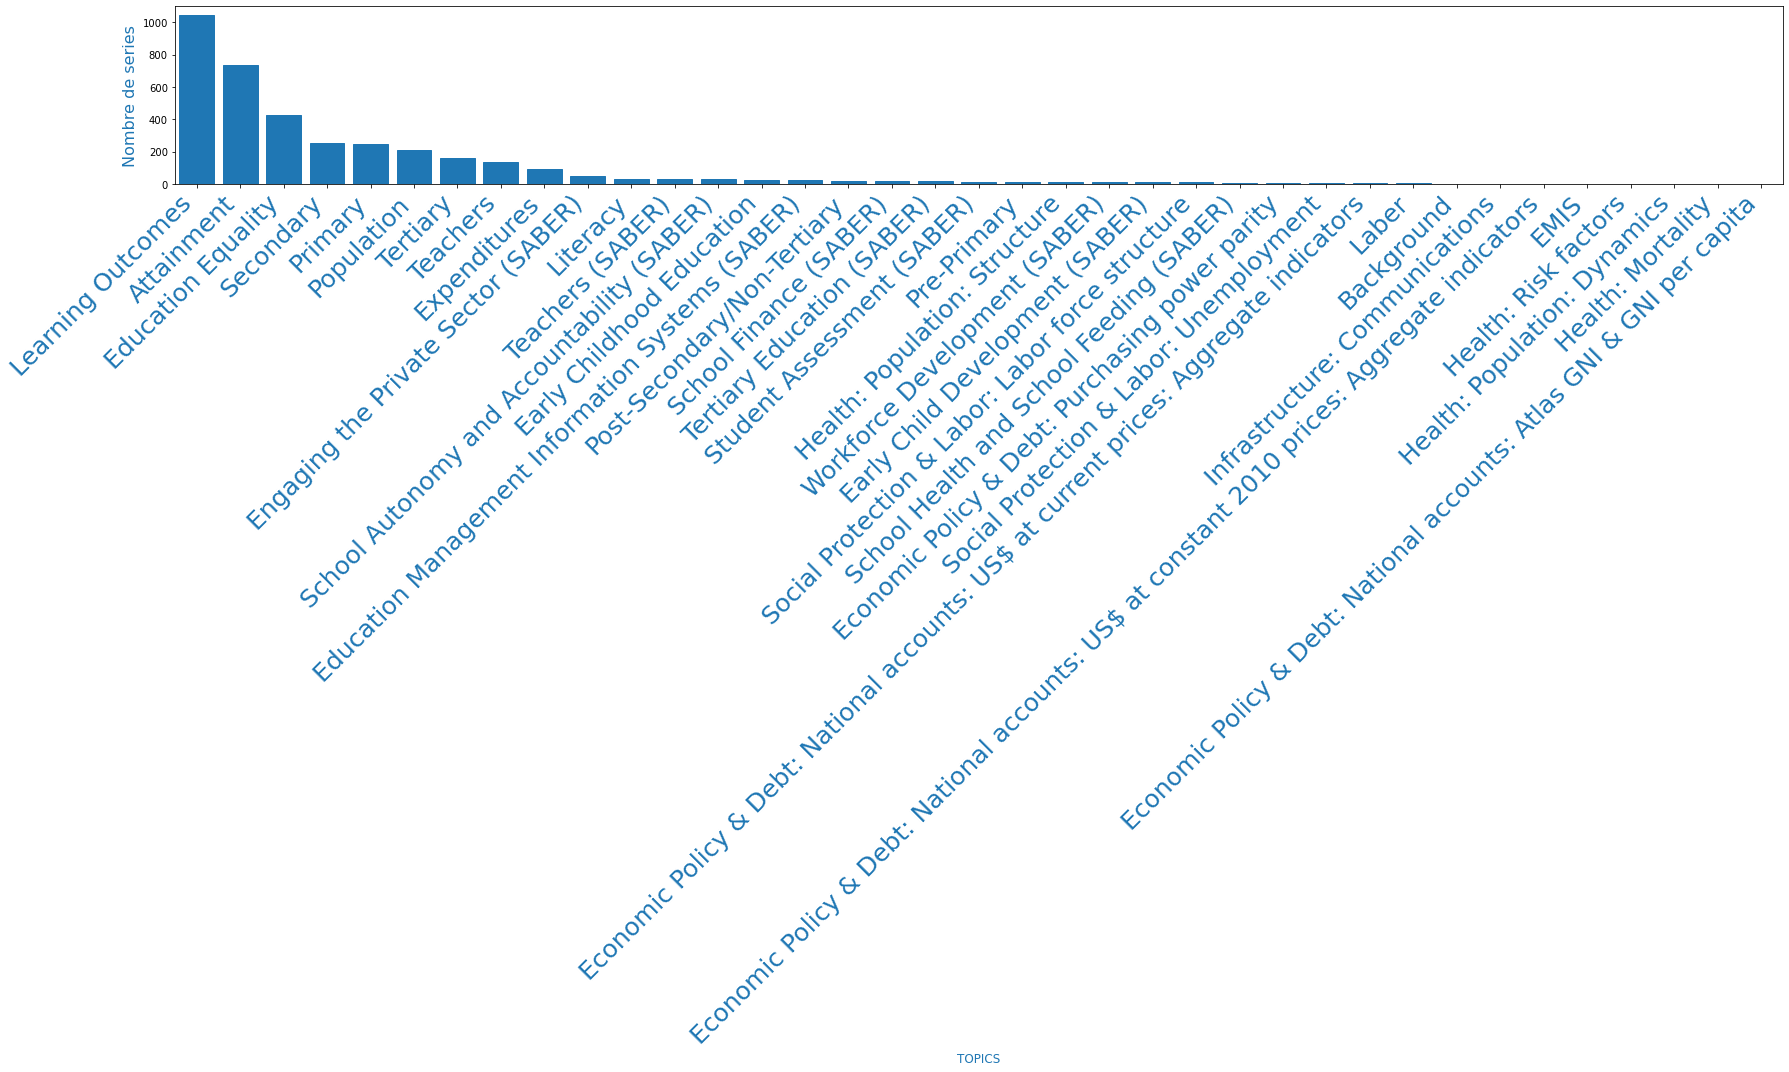

In [150]:
data = np.array([Topic_by['Series Code'].values])
columns = Topic_by.index
df_graph = pd.DataFrame(data = data, columns = columns)

fig, ax = plt.subplots(1,1, figsize=(25,15))
g = sns.barplot(data = df_graph)

for bar in ax.patches:
    bar.set_color(c = 'tab:blue')
    
for label in ax.xaxis.get_ticklabels():
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(25)
    label.set_horizontalalignment('right')

ax.set_xlabel('TOPICS', color='tab:blue', size = 12)
ax.set_ylabel('Nombre de series', color='tab:blue', size = 16) 

graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,"Nombre d'indicateur par topic_topic.jpg")
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

### Liste des differents topic et series associées a la data base

In [80]:
for topic in df_EdStatsSeries['Topic'].unique():
    print("\n --------------------------------------------------\n",
          topic,
          "\n --------------------------------------------------\n")
    for short_def in df_EdStatsSeries['Indicator Name'][df_EdStatsSeries['Topic']== topic].unique():
        print(short_def, "\n")


 --------------------------------------------------
 Attainment 
 --------------------------------------------------

Barro-Lee: Percentage of female population age 15-19 with no education 

Barro-Lee: Percentage of population age 15-19 with no education 

Barro-Lee: Percentage of female population age 15+ with no education 

Barro-Lee: Percentage of population age 15+ with no education 

Barro-Lee: Percentage of female population age 20-24 with no education 

Barro-Lee: Percentage of population age 20-24 with no education 

Barro-Lee: Percentage of female population age 25-29 with no education 

Barro-Lee: Percentage of population age 25-29 with no education 

Barro-Lee: Percentage of female population age 25+ with no education 

Barro-Lee: Percentage of population age 25+ with no education 

Barro-Lee: Percentage of female population age 30-34 with no education 

Barro-Lee: Percentage of population age 30-34 with no education 

Barro-Lee: Percentage of female population age 35-39 wi


LLECE: Female 6th grade students by reading proficiency level (%). Level 3 

LLECE: Male 6th grade students by reading proficiency level (%). Level 3 

LLECE: 6th grade students by reading proficiency level (%). Level 4 

LLECE: Female 6th grade students by reading proficiency level (%). Level 4 

LLECE: Male 6th grade students by reading proficiency level (%). Level 4 

LLECE: Mean performance on the reading scale for 6th grade students. Female 

LLECE: Mean performance on the reading scale for 6th grade students. Male 

LLECE: Distribution of 6th Grade Reading Scores: 10th Percentile Score 

LLECE: Distribution of 6th Grade Reading Scores: 25th Percentile Score 

LLECE: Distribution of 6th Grade Reading Scores: 50th Percentile Score 

LLECE: Distribution of 6th Grade Reading Scores: 75th Percentile Score 

LLECE: Distribution of 6th Grade Reading Scores: 90th Percentile Score 

LLECE: Mean performance on the science scale for 6th grade students. Total 

LLECE: 6th grade students by 


Enrolment in tertiary education, ISCED 6 programmes, female (number) 

Enrolment in tertiary education, ISCED 7 programmes, both sexes (number) 

Enrolment in tertiary education, ISCED 7 programmes, female (number) 

Enrolment in tertiary education, ISCED 8 programmes, both sexes (number) 

Enrolment in tertiary education, ISCED 8 programmes, female (number) 

Percentage of students in post-secondary non-tertiary education who are female (%) 

Percentage of students in tertiary ISCED 5 programmes who are female (%) 

Percentage of students enrolled in Education programmes in tertiary education who are female (%) 

Percentage of students enrolled in Humanities and Arts programmes in tertiary education who are female (%) 

Percentage of students enrolled in Social Sciences, Business and Law programmes in tertiary education who are female (%) 

Percentage of students enrolled in Science programmes in tertiary education who are female (%) 

Percentage of students enrolled in Engineering, 

# Jeu de données 4

## EdStatsFootNote - date des estimations des series

In [81]:
nom_fichier = 'EdStatsFootNote.csv'
fichier_source = os.path.join(folder, nom_fichier)
df_EdStatsFootNote = pd.read_csv(fichier_source)
df_EdStatsFootNote.shape

(643638, 5)

In [82]:
df_EdStatsFootNote.head(10)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [83]:
df_EdStatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [84]:
df_EdStatsFootNote_M = df_EdStatsFootNote.copy()

In [85]:
df_EdStatsFootNote_M.drop('Unnamed: 4', axis = 1, inplace = True)

La base de donnée nous donnes la date a laquelle les differentes series pour chaque pays ont ete faites.

In [86]:
df_EdStatsFootNote['CountryCode'].nunique()

239

In [87]:
df_EdStatsFootNote['SeriesCode'].nunique()

1558

In [88]:
df_EdStatsFootNote['Year'].nunique()

56

In [89]:
df_EdStatsFootNote['DESCRIPTION'].nunique()

9102

In [90]:
df_EdStatsFootNote['DESCRIPTION'].unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

On remarque que le nombres différentes de series est de 1558 alors qu il y a 3665 series référencées dans la base df_EdStatsSeries.

### Nous allons essayer de regarder pourquoi il y n y a pas le même nombre de series

In [91]:
liste_series_manquantes = []
for serie in df_EdStatsSeries['Series Code'].unique():
    if serie not in df_EdStatsFootNote['SeriesCode'].unique():
        liste_series_manquantes.append(serie)

In [92]:
len(liste_series_manquantes)

2213

In [93]:
2213 + 1558

3771

In [94]:
liste_series_manquantes

['BAR.NOED.1519.FE.ZS',
 'BAR.NOED.1519.ZS',
 'BAR.NOED.15UP.FE.ZS',
 'BAR.NOED.15UP.ZS',
 'BAR.NOED.2024.FE.ZS',
 'BAR.NOED.2024.ZS',
 'BAR.NOED.2529.FE.ZS',
 'BAR.NOED.2529.ZS',
 'BAR.NOED.25UP.FE.ZS',
 'BAR.NOED.25UP.ZS',
 'BAR.NOED.3034.FE.ZS',
 'BAR.NOED.3034.ZS',
 'BAR.NOED.3539.FE.ZS',
 'BAR.NOED.3539.ZS',
 'BAR.NOED.4044.FE.ZS',
 'BAR.NOED.4044.ZS',
 'BAR.NOED.4549.FE.ZS',
 'BAR.NOED.4549.ZS',
 'BAR.NOED.5054.FE.ZS',
 'BAR.NOED.5054.ZS',
 'BAR.NOED.5559.FE.ZS',
 'BAR.NOED.5559.ZS',
 'BAR.NOED.6064.FE.ZS',
 'BAR.NOED.6064.ZS',
 'BAR.NOED.6569.FE.ZS',
 'BAR.NOED.6569.ZS',
 'BAR.NOED.7074.FE.ZS',
 'BAR.NOED.7074.ZS',
 'BAR.NOED.75UP.FE.ZS',
 'BAR.NOED.75UP.ZS',
 'BAR.POP.1519',
 'BAR.POP.1519.FE',
 'BAR.POP.15UP',
 'BAR.POP.15UP.FE',
 'BAR.POP.2024',
 'BAR.POP.2024.FE',
 'BAR.POP.2529',
 'BAR.POP.2529.FE',
 'BAR.POP.25UP',
 'BAR.POP.25UP.FE',
 'BAR.POP.3034',
 'BAR.POP.3034.FE',
 'BAR.POP.3539',
 'BAR.POP.3539.FE',
 'BAR.POP.4044',
 'BAR.POP.4044.FE',
 'BAR.POP.4549',
 'BAR.POP.45

In [95]:
df_EdStatsSeries["Valeur Manquante"] = df_EdStatsSeries['Series Code'].apply(lambda x: 1 if any(i in x for i in liste_series_manquantes) else 0)

In [96]:
cond = df_EdStatsSeries['Valeur Manquante'] == 1
df_EdStatsSeries[['Series Code','Indicator Name']][cond]

,Series Code,Indicator Name
0,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age...
...,...,...
3634,UIS.XSPENDP.FDPUB.FNNONS,Current expenditure other than staff compensat...
3635,UIS.XSPENDP.FDPUB.FNS,All staff compensation as % of total expenditu...
3636,UIS.XUNIT.GDPCAP.2.FSGOV,Government expenditure per lower secondary stu...
3640,UIS.XUNIT.PPP.2.FSGOV,Government expenditure per lower secondary stu...


# Jeu de données 5

## EdStatsData -Valeurs numeriques des  3665 series pour differentes dates et pour les  242 pays

In [224]:
nom_fichier = 'EdStatsData.csv'
fichier_source = os.path.join(folder, nom_fichier)
df_EdStatsData = pd.read_csv(fichier_source)
df_EdStatsData.shape

(886930, 70)

In [225]:
df_EdStatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [226]:
df_EdStatsData.drop('Unnamed: 69', axis = 1, inplace = True)

In [227]:
#creation d'une copie
df_EdStatsData_M = df_EdStatsData.copy()

### Missing data par année

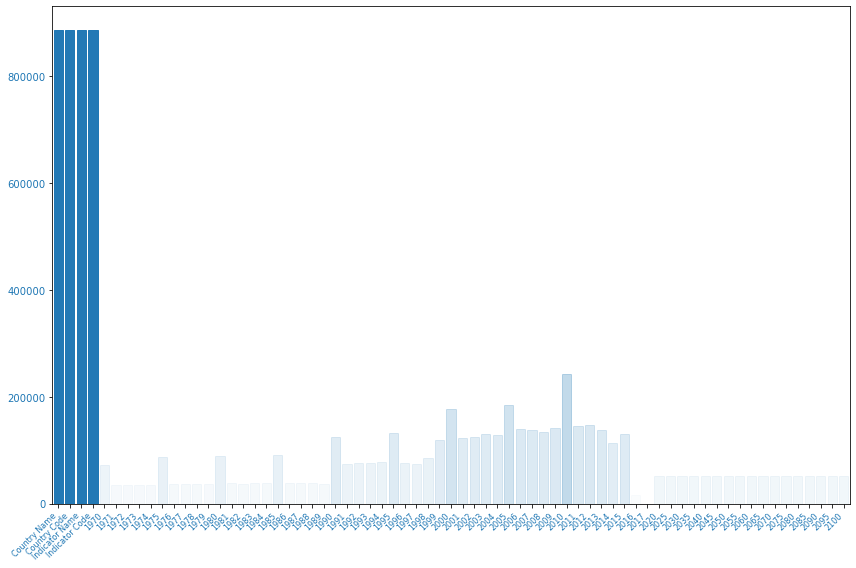

In [228]:

data = pd.DataFrame(data = np.array([df_EdStatsData_M.notna().sum().values]),columns = df_EdStatsData_M.columns.values )

#sns.palplot (sns.color_palette ("Blues", 10))
#colormap = sns.color_palette("Blues") 


fig, ax = plt.subplots(1,1, figsize=(12,8))

g = sns.barplot(data = data, palette = 'Blues', saturation = 1)

for bar in ax.patches:
    bar.set_color(c= 'tab:blue')
    alpha = bar.get_height()/900000
    bar.set_alpha(alpha =alpha)
    
for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(10)

graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_EdStatsData.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

### Missing data par pays

In [229]:
df_EdStatsData['Country Name'].nunique()

242

In [248]:
#missing data par country Name
CountryName_by = df_EdStatsData.groupby('Country Name').count()
CountryName_by

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3665,3665,3665,523,139,158,236,351,537,164,318,295,123,631,302,267,53,284,642,151,57,122,96,648,277,...,761,682,434,446,543,352,43,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albania,3665,3665,3665,409,78,74,50,50,410,105,49,132,109,476,143,117,143,149,506,150,150,150,150,698,351,...,1347,872,926,890,693,797,68,0,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
Algeria,3665,3665,3665,416,190,298,325,327,688,328,328,326,332,688,261,328,200,321,670,251,284,253,316,875,518,...,1366,689,541,538,492,730,43,0,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
American Samoa,3665,3665,3665,2,9,23,23,23,23,21,22,24,17,47,18,30,22,50,41,47,46,46,49,48,25,...,8,8,8,8,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andorra,3665,3665,3665,41,63,63,63,63,99,63,41,41,41,41,41,41,105,41,42,42,42,42,42,43,42,...,349,326,373,454,430,156,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,3665,3665,3665,35,35,35,35,35,36,41,36,36,36,36,41,36,36,36,36,41,36,36,36,232,240,...,1192,931,895,959,835,758,73,0,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
World,3665,3665,3665,175,175,178,180,184,184,184,184,184,184,187,190,187,187,189,201,209,210,208,209,220,225,...,646,338,350,353,340,457,34,0,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
"Yemen, Rep.",3665,3665,3665,410,50,50,50,50,410,50,50,50,50,410,50,50,50,50,410,50,50,50,50,605,261,...,1007,513,603,623,203,277,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


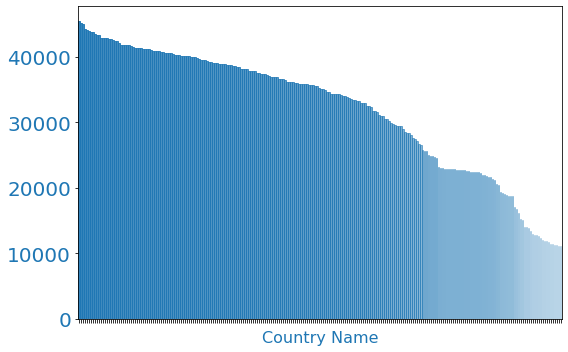

In [249]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
data = CountryName_by.sum(axis = 1).sort_values(ascending = False)


g = sns.barplot(x=data.index, y = data.values)

for bar in ax.patches:
    bar.set_color('tab:blue')
    alpha = bar.get_height()/50000
    bar.set_alpha(alpha)
    
ax.set_xticklabels([])

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(20)
    
ax.set_xlabel('Country Name', color = 'tab:blue', size = 16 )


graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_ContryName_by.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.tight_layout()

plt.show()

In [250]:
data

Country Name
Malta                       45417
Cyprus                      45203
Italy                       44976
Bulgaria                    44190
Hungary                     44041
                            ...  
Greenland                   11476
Isle of Man                 11235
Faroe Islands               11202
Northern Mariana Islands    11150
St. Martin (French part)    11083
Length: 242, dtype: int64

In [232]:
max_donnée = df_EdStatsData['Indicator Code'].nunique()* len(df_EdStatsData.columns)
max_donnée

252885

### missing data par Indicator Code

In [233]:
IndicatorCode_by = df_EdStatsData.groupby('Indicator Code').count()
IndicatorCode_by

,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Indicator Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAR.NOED.1519.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAR.NOED.15UP.FE.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAR.NOED.15UP.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAR.NOED.2024.FE.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UIS.XUNIT.USCONST.3.FSGOV,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70,74,61,47,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UIS.XUNIT.USCONST.4.FSGOV,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37,35,33,19,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UIS.XUNIT.USCONST.56.FSGOV,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,94,87,74,55,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


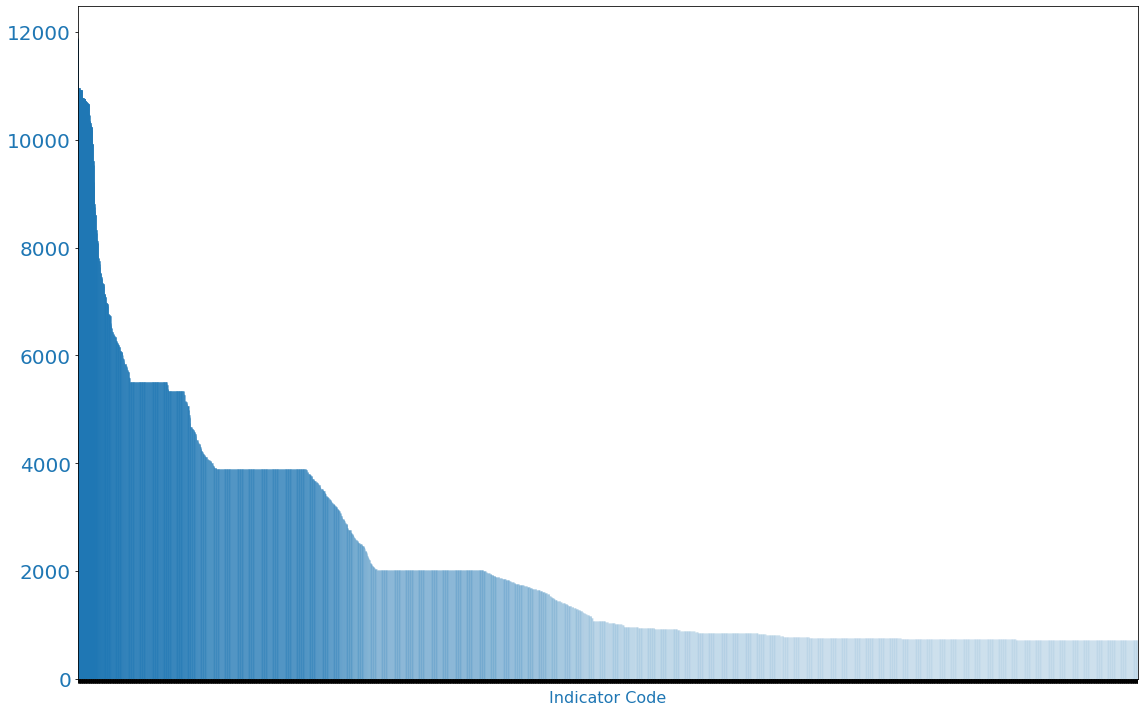

In [244]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
data = IndicatorCode_by.sum(axis = 1).sort_values(ascending = False)


g = sns.barplot(x=data.index, y = data.values)

for bar in ax.patches:
    bar.set_color('tab:blue')
    alpha = bar.get_height()/14000
    bar.set_alpha(alpha)
    
"""for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')
    label.set_text('test')"""
ax.set_xticklabels([])

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(20)
    
ax.set_xlabel('Indicator Code', color = 'tab:blue', size = 16 )

graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_IndicatorCode_by.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.tight_layout()

plt.show()


In [246]:
data

Indicator Code
SP.POP.TOTL                11881
SP.POP.GROW                11875
SP.POP.1564.TO.ZS          10969
SP.POP.0014.TO.ZS          10959
SP.POP.TOTL.FE.ZS          10959
                           ...  
LO.EGRA.NCWPM.GA.2GRD        727
LO.EGRA.NCWPM.FRN.3GRD       727
LO.EGRA.NCWPM.FLF.2GRD       727
LO.EGRA.NCWPM.FAN.2GRD       727
LO.EGRA.LSTN.0.KII.2GRD      727
Length: 3665, dtype: int64

In [235]:
max_donnée = df_EdStatsData['Country Code'].nunique()* len(df_EdStatsData.columns)
max_donnée

16698

In [236]:
df_EdStatsData['Indicator Code'].nunique()

3665

On remarque que la taille de la base de données est egale aux nombres de pays fois le nombre de types de series.

In [237]:
242 * 3665

886930

### Comparaison entre les differents jeux données

In [238]:
#Etape 1 : creation d'une colonne "Country&Indicateur Code" pour les dex jeux
df_EdStatsData_M['Country&Indicateur Code'] = df_EdStatsData_M['Country Code'] + df_EdStatsData_M['Indicator Code']
df_EdStatsCountrySeries_M['Country&Indicateur Code'] = df_EdStatsCountrySeries_M['CountryCode'] + df_EdStatsCountrySeries_M['SeriesCode']


In [239]:
%%time

"""Etape2 : creation d'une colonne indicatrice EdStatsCountrySeries dans le jeu df_EdStatsData_M qui
aura pour valeur 1 si le couple (pays, indicateur) est present dans le jeux df_EdStatsCountrySeries_M
0 sinon."""


df_EdStatsData_M['EdStatsCountrySeries'] = [1 if x in df_EdStatsCountrySeries_M['Country&Indicateur Code'].unique()
                                               else 0 for x in df_EdStatsData_M['Country&Indicateur Code']]

CPU times: user 1min 34s, sys: 0 ns, total: 1min 34s
Wall time: 1min 34s


In [240]:
df_EdStatsData_M['EdStatsCountrySeries'].sum()

613

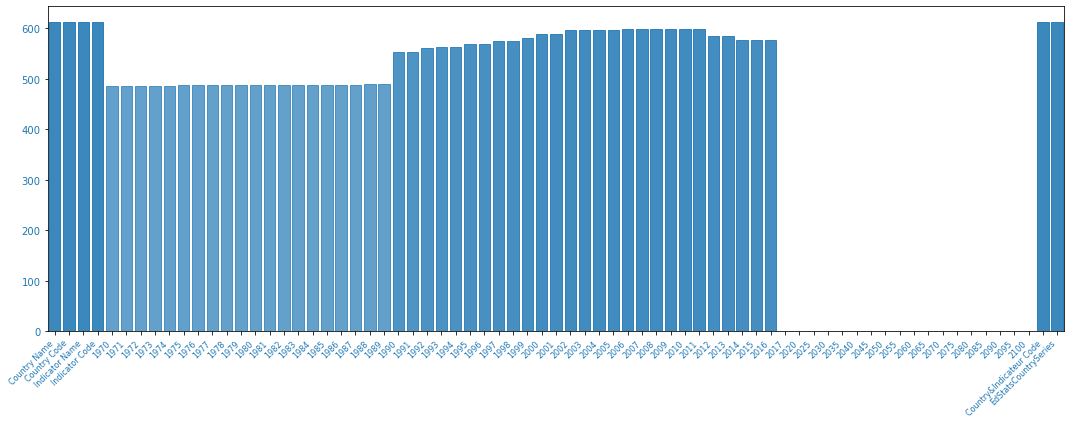

In [161]:
cond = df_EdStatsData_M['EdStatsCountrySeries'] == 1
data = pd.DataFrame(data = np.array([df_EdStatsData_M[cond].notna().sum().values]),
                    columns = df_EdStatsData_M.columns.values )

fig, ax = plt.subplots(1,1, figsize=(15,6))
g = sns.barplot(data = data)

for bar in ax.patches:
    bar.set_color('tab:blue')
    alpha = bar.get_height()/700
    bar.set_alpha(alpha =alpha)
    
for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')


graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_année_indicateur_EdStatsCountrySeries.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.tight_layout()

plt.show()

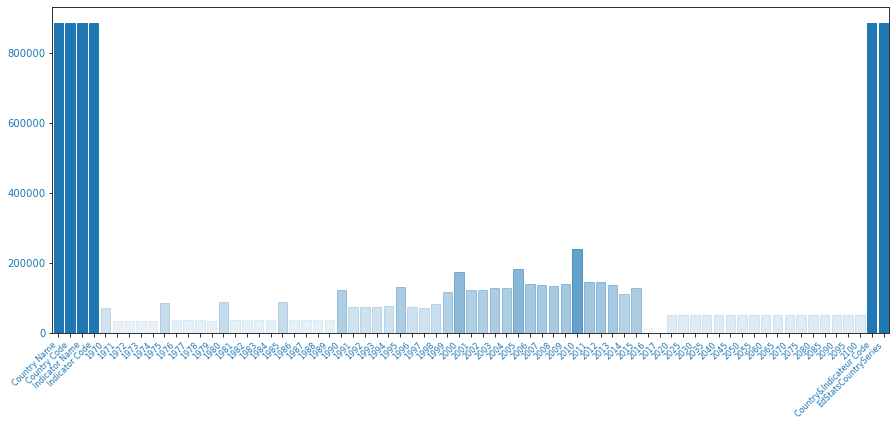

In [162]:
cond = df_EdStatsData_M['EdStatsCountrySeries'] == 0

data = pd.DataFrame(data = np.array([df_EdStatsData_M[cond].notna().sum().values]),
                    columns = df_EdStatsData_M.columns.values )

fig, ax = plt.subplots(1,1, figsize=(15,6))
g = sns.barplot(data = data)

for bar in ax.patches:
    bar.set_color('tab:blue')
    if bar.get_height() < 800000:
        alpha = bar.get_height()/350000
    else:
        alpha= 1
    bar.set_alpha(alpha =alpha)
    
for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    
graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_année_indicateur_hors_EdStatsCountrySeries.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.show()

In [154]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Country&Indicateur Code,EdStatsCountrySeries
0,886317,886317,886317,886317,71803,35052,35134,35060,35245,86819,36996,37086,37088,36321,88634,38289,37023,37972,38118,89808,38884,38153,38062,37050,123852,...,146679,136924,113211,130480,15882,143,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,51436,886317,886317


## indicateur de prediction

In [115]:
cond1 = df_EdStatsData_M['EdStatsCountrySeries'] == 0
cond2 = df_EdStatsData_M['2025'].notna()
df_temp = df_EdStatsData_M[cond1&cond2]
df_temp['Indicator Code'].unique()

array(['PRJ.MYS.0T19.FE', 'PRJ.MYS.0T19.MA', 'PRJ.MYS.0T19.MF',
       'PRJ.MYS.15UP.FE', 'PRJ.MYS.15UP.GPI', 'PRJ.MYS.15UP.MA',
       'PRJ.MYS.15UP.MF', 'PRJ.MYS.1519.FE', 'PRJ.MYS.1519.MA',
       'PRJ.MYS.1519.MF', 'PRJ.MYS.2024.FE', 'PRJ.MYS.2024.MA',
       'PRJ.MYS.2024.MF', 'PRJ.MYS.2039.FE', 'PRJ.MYS.2039.MA',
       'PRJ.MYS.2039.MF', 'PRJ.MYS.2064.FE', 'PRJ.MYS.2064.MA',
       'PRJ.MYS.2064.MF', 'PRJ.MYS.25UP.FE', 'PRJ.MYS.25UP.GPI',
       'PRJ.MYS.25UP.MA', 'PRJ.MYS.25UP.MF', 'PRJ.MYS.2529.FE',
       'PRJ.MYS.2529.MA', 'PRJ.MYS.2529.MF', 'PRJ.MYS.4064.FE',
       'PRJ.MYS.4064.MA', 'PRJ.MYS.4064.MF', 'PRJ.MYS.60UP.FE',
       'PRJ.MYS.60UP.MA', 'PRJ.MYS.60UP.MF', 'PRJ.MYS.65UP.FE',
       'PRJ.MYS.65UP.MA', 'PRJ.MYS.65UP.MF', 'PRJ.MYS.80UP.FE',
       'PRJ.MYS.80UP.MA', 'PRJ.MYS.80UP.MF', 'PRJ.ATT.15UP.S1.FE',
       'PRJ.ATT.15UP.S1.MA', 'PRJ.ATT.15UP.S1.MF', 'PRJ.ATT.15UP.2.FE',
       'PRJ.ATT.15UP.2.MA', 'PRJ.ATT.15UP.2.MF', 'PRJ.ATT.15UP.NED.FE',
       'PRJ.ATT.15U

In [116]:
df_temp['Indicator Name'].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

## Choix de séries (criteres) que nous allons utiliser pour notre etude.

- Population, total
- Population ages 0-14, total
- population age 15-64
- population growth
- GDP per capita (current US$)
- Internet users (per 100 people)
- Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary
- Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary
- Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary
- Barro-Lee: Percentage of female population age 25-29 with secondary schooling. Completed Secondary
- Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary
- Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary

In [117]:
# on recupere le code indication des critères avec la data frame df_EdStatsSeries.
liste_indication_name = ['GDP per capita (current US$)',
                        'Population, total',
                        'Population ages 0-14, total',
                        'Population ages 15-64, total',
                        'Population growth (annual %)',
                        'Internet users (per 100 people)',
                        'Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary',
                        'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
                        'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary',
                        'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
                        'Barro-Lee: Percentage of female population age 25-29 with secondary schooling. Completed Secondary',
                        'Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary']

In [164]:
liste_SeriesCode=[]
for ind_name in liste_indication_name:
    code = df_EdStatsSeries['Series Code'][df_EdStatsSeries['Indicator Name'] == ind_name ]
    liste_SeriesCode.append(code.values[0])
liste_SeriesCode

['NY.GDP.PCAP.PP.CD',
 'SP.POP.TOTL',
 'SP.POP.0014.TO',
 'SP.POP.1564.TO',
 'SP.POP.GROW',
 'IT.NET.USER.P2',
 'BAR.PRM.CMPT.15UP.ZS',
 'BAR.SEC.CMPT.15UP.ZS',
 'BAR.TER.CMPT.15UP.ZS',
 'BAR.SEC.CMPT.2024.ZS',
 'BAR.SEC.CMPT.2529.FE.ZS',
 'BAR.TER.CMPT.25UP.ZS']

## Creation dune Data base pour l analyse

In [166]:
#nous allons creer une Data base avec les les series qui nous interesse pour notre etude
#nous allons regarder les missing value sur les series qui nous interesse:
df_EdStatsData_M['select_series']=df_EdStatsData_M['Indicator Code'].apply(lambda x: 1 if x in liste_SeriesCode else 0)

In [168]:
#verification que la fonction précedente retourne les bonnes valeurs
df_EdStatsData_M[df_EdStatsData_M['Indicator Code']=='SP.POP.0014.TO']['select_series']

2422      1
6087      1
9752      1
13417     1
17082     1
         ..
871027    1
874692    1
878357    1
882022    1
885687    1
Name: select_series, Length: 242, dtype: int64

In [170]:
df_EdStatsData_M = df_EdStatsData[df_EdStatsData['select_series'] == 1]
df_EdStatsData_M['Indicator Code'].nunique()

12

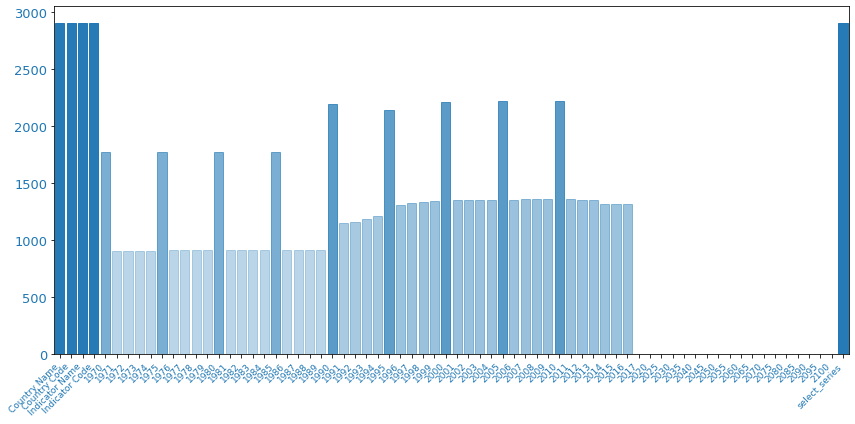

In [171]:
#missing values

data = pd.DataFrame(data = np.array([df_EdStatsData_M.notna().sum().values]), columns = df_EdStatsData_M.columns.values)
 


fig, ax = plt.subplots(1,1, figsize=(12,6))

g = sns.barplot(data = data, palette = 'Blues', saturation = 1)
for bar in ax.patches:
    bar.set_color('tab:blue')
    alpha = bar.get_height()/3000
    bar.set_alpha(alpha)

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(9)
    label.set_horizontalalignment('right')

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(13)

graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_IndicatorCode_selection.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [172]:
#missing data par pays
df_EdStatsData_modified

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,select_series
300,Arab World,ARB,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.2529.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
375,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
377,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
379,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
391,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01,2.311999e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,3.261985e+00,3.336115e+00,3.392956e+00,3.395006e+00,3.329621e+00,3.230955e+00,3.106095e+00,3.022714e+00,3.048897e+00,3.209207e+00,3.441809e+00,3.669444e+00,3.822638e+00,3.886794e+00,3.844513e+00,3.725636e+00,3.599446e+00,3.471469e+00,3.291924e+00,3.058017e+00,2.793947e+00,...,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00,2.345643e+00,2.336070e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
885687,Zimbabwe,ZWE,"Population, ages 0-14, total",SP.POP.0014.TO,2.494843e+06,2.583782e+06,2.677958e+06,2.775375e+06,2.872434e+06,2.967188e+06,3.074590e+06,3.179628e+06,3.286004e+06,3.399420e+06,3.523694e+06,3.647009e+06,3.776599e+06,3.909981e+06,4.042382e+06,4.169438e+06,4.302918e+06,4.426797e+06,4.538907e+06,4.636809e+06,4.718341e+06,...,5.970883e+06,6.105032e+06,6.248747e+06,6.396521e+06,6.542997e+06,6.682925e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
885751,Zimbabwe,ZWE,"Population, ages 15-64, total",SP.POP.1564.TO,2.514675e+06,2.596620e+06,2.682592e+06,2.771992e+06,2.864696e+06,2.960434e+06,3.041151e+06,3.125316e+06,3.215710e+06,3.315524e+06,3.426989e+06,3.563013e+06,3.713256e+06,3.875459e+06,4.047476e+06,4.227587e+06,4.402134e+06,4.586759e+06,4.777548e+06,4.969763e+06,5.160414e+06,...,7.982992e+06,8.171080e+06,8.369351e+06,8.575500e+06,8.788963e+06,9.012715e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [173]:
df_EdStatsData_modified.columns.get_loc("2020")

52

In [174]:
df_EdStatsData_modified.columns[52:-3]

Index(['2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060',
       '2065', '2070', '2075', '2080', '2085', '2090'],
      dtype='object')

In [175]:
#nous pouvons deja supprimer les colonnes vide:
df_EdStatsData_M.drop(df_EdStatsData_modified.columns[52:-2], axis = 1, inplace = True)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [176]:
df_EdStatsData_modified.shape

(2904, 70)

In [179]:
#nous allons regarder la distribution des données en fonctions des pays et des series
IndicatorCode_by = df_EdStatsData_M.groupby(["Indicator Code"]).count()
IndicatorCode_by

,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2100,select_series
Indicator Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAR.PRM.CMPT.15UP.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0,0,242
BAR.SEC.CMPT.15UP.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0,0,242
BAR.SEC.CMPT.2024.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0,0,242
BAR.SEC.CMPT.2529.FE.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0,0,242
BAR.TER.CMPT.15UP.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0,0,242
BAR.TER.CMPT.25UP.ZS,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,...,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0,0,242
IT.NET.USER.P2,242,242,242,7,0,0,0,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,231,44,...,158,195,206,212,219,221,222,224,218,221,223,222,229,228,227,227,229,227,226,223,223,223,0,0,242
NY.GDP.PCAP.PP.CD,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,192,...,204,205,206,206,207,211,213,214,214,214,214,214,214,215,215,215,217,213,213,207,206,203,0,0,242
SP.POP.0014.TO,242,242,242,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,218,218,...,218,218,218,219,219,219,219,219,219,219,219,219,219,219,219,219,219,218,218,213,213,213,0,0,242


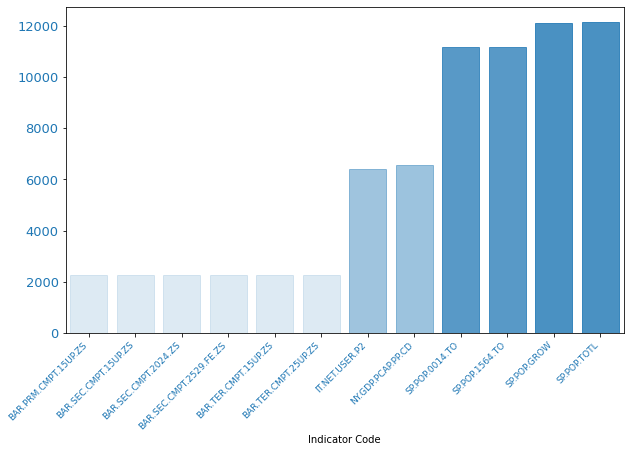

In [180]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
data = IndicatorCode_by.sum(axis = 1)

g = sns.barplot(x=data.index, y = data.values)

for bar in ax.patches:
    bar.set_color('tab:blue')
    alpha = bar.get_height()/15000
    bar.set_alpha(alpha)

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_rotation(45)
    label.set_fontsize(9)
    label.set_horizontalalignment('right')

for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('tab:blue')
    label.set_fontsize(13)
    
graph_path = os.path.join(CURRENT_DIRECTORY, 'Graphique')
path_complet = os.path.join(graph_path,'Missing_data_IndicatorCode_selection2.jpg')
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

plt.show()

In [181]:
data

Indicator Code
BAR.PRM.CMPT.15UP.ZS        2264
BAR.SEC.CMPT.15UP.ZS        2264
BAR.SEC.CMPT.2024.ZS        2264
BAR.SEC.CMPT.2529.FE.ZS     2264
BAR.TER.CMPT.15UP.ZS        2264
BAR.TER.CMPT.25UP.ZS        2264
IT.NET.USER.P2              6407
NY.GDP.PCAP.PP.CD           6575
SP.POP.0014.TO             11170
SP.POP.1564.TO             11170
SP.POP.GROW                12117
SP.POP.TOTL                12123
dtype: int64

In [243]:
CountryName_by = df_EdStatsData_modified.groupby(['Country Name']).count()
CountryName_by

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,select_series
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,12,12,12,10,4,4,4,4,10,4,4,4,4,10,4,4,4,4,10,4,4,4,4,11,4,...,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
Albania,12,12,12,10,4,4,4,4,10,4,4,4,4,10,4,4,4,4,10,4,4,4,4,12,5,...,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
Algeria,12,12,12,10,4,4,4,4,10,4,4,4,4,10,4,4,4,4,10,4,4,4,4,12,5,...,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
American Samoa,12,12,12,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,...,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
Andorra,12,12,12,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,...,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,...,5,5,5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
World,12,12,12,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,5,...,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
"Yemen, Rep.",12,12,12,10,4,4,4,4,10,4,4,4,4,10,4,4,4,4,10,4,4,4,4,12,5,...,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12


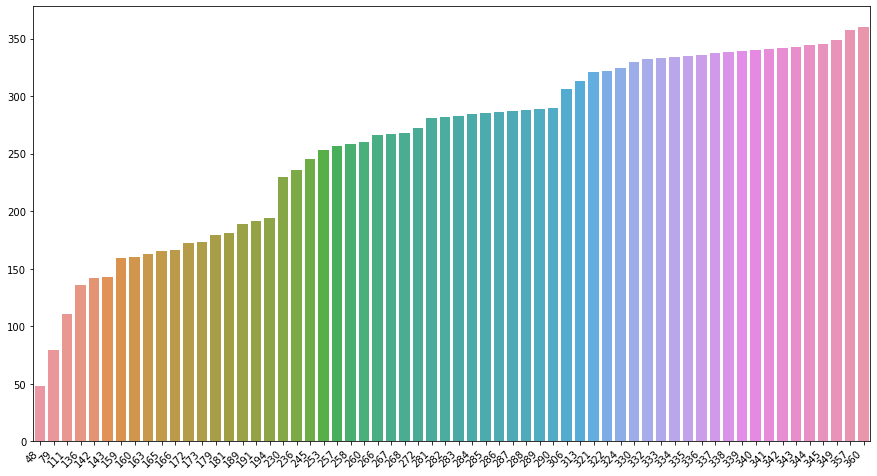

In [183]:
fig, ax = plt.subplots(1,1, figsize =(15,8))

data = CountryName_by.sum(axis = 1)
x = data.values
y = data.index
g = sns.barplot(data = data, x=y, y = x)

g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment ='right')

plt.show()

In [184]:
data.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'World', 'Yemen, Rep.',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country Name', length=242)

In [185]:
#Creation de la base de donnée

In [187]:
df_country = df_EdStatsCountry_M[['Country Code', 'Short Name', 'Income Group']]
df_data_2010 = df_EdStatsData_M[['Country Code','Country Name','Indicator Code','Indicator Name','2010']]

In [188]:
df_country

,Country Code,Short Name,Income Group
0,ABW,Aruba,High income
1,AFG,Afghanistan,Low income
2,AGO,Angola,Upper middle income
3,ALB,Albania,Upper middle income
4,AND,Andorra,High income
...,...,...,...
236,XKX,Kosovo,Lower middle income
237,YEM,Yemen,Lower middle income
238,ZAF,South Africa,Upper middle income
239,ZMB,Zambia,Lower middle income


In [189]:
cond = df_data_2010['Indicator Code'] == 'IT.NET.USER.P2'
data = df_data_2010[cond]['2010']
df_data_2010['Country Code'].nunique()

242

In [190]:
df_Analyse_temp = df_country.copy()
for code in df_data_2010['Indicator Code'].unique():
    cond = df_data_2010['Indicator Code'] == code
    df_temp = df_data_2010[cond][['Country Code','2010']]
    df_temp.rename(columns={'2010': code}, inplace=True)
    df_Analyse_2010 = pd.merge(df_Analyse_temp, df_temp, on = ['Country Code'])
    df_Analyse_temp = df_Analyse_2010

In [191]:
df_Analyse_2010

,Country Code,Short Name,Income Group,BAR.SEC.CMPT.2529.FE.ZS,BAR.PRM.CMPT.15UP.ZS,BAR.SEC.CMPT.15UP.ZS,BAR.TER.CMPT.15UP.ZS,BAR.SEC.CMPT.2024.ZS,BAR.TER.CMPT.25UP.ZS,NY.GDP.PCAP.PP.CD,IT.NET.USER.P2,SP.POP.GROW,SP.POP.0014.TO,SP.POP.1564.TO,SP.POP.TOTL
0,ABW,Aruba,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,0.212680,21222.0,69987.0,1.016690e+05
1,AFG,Afghanistan,Low income,0.03,12.86,8.65,3.65,15.60,5.51,1581.600836,4.00,2.812617,13767370.0,14372378.0,2.880317e+07
2,AGO,Angola,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,5775.864013,2.80,3.570099,11055071.0,11771088.0,2.336913e+07
3,ALB,Albania,Upper middle income,42.51,9.03,42.90,0.93,55.96,0.99,9646.615727,45.00,-0.496462,654461.0,1947666.0,2.913021e+06
4,AND,Andorra,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.00,-0.015393,NaN,NaN,8.444900e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,7716.611869,NaN,0.803249,NaN,NaN,1.775680e+06
237,YEM,Yemen,Lower middle income,9.26,10.56,10.68,1.50,19.24,1.68,4388.144847,12.35,2.713034,10024199.0,12945818.0,2.360678e+07
238,ZAF,South Africa,Upper middle income,74.44,6.22,53.90,0.32,74.60,0.46,11785.605136,24.00,1.429604,15513076.0,33078665.0,5.097943e+07
239,ZMB,Zambia,Lower middle income,13.25,27.45,16.53,0.49,15.32,1.00,3212.941881,10.00,2.883152,6478323.0,7017292.0,1.385003e+07


In [206]:
df_Analyse_2010.notna().sum()

Country Code               241
Short Name                 241
Income Group               214
BAR.SEC.CMPT.2529.FE.ZS    144
BAR.PRM.CMPT.15UP.ZS       144
BAR.SEC.CMPT.15UP.ZS       144
BAR.TER.CMPT.15UP.ZS       144
BAR.SEC.CMPT.2024.ZS       144
BAR.TER.CMPT.25UP.ZS       144
NY.GDP.PCAP.PP.CD          215
IT.NET.USER.P2             227
SP.POP.GROW                240
SP.POP.0014.TO             219
SP.POP.1564.TO             219
SP.POP.TOTL                240
dtype: int64

In [192]:
CountryCode_by = df_Analyse_2010.groupby('Short Name').count()

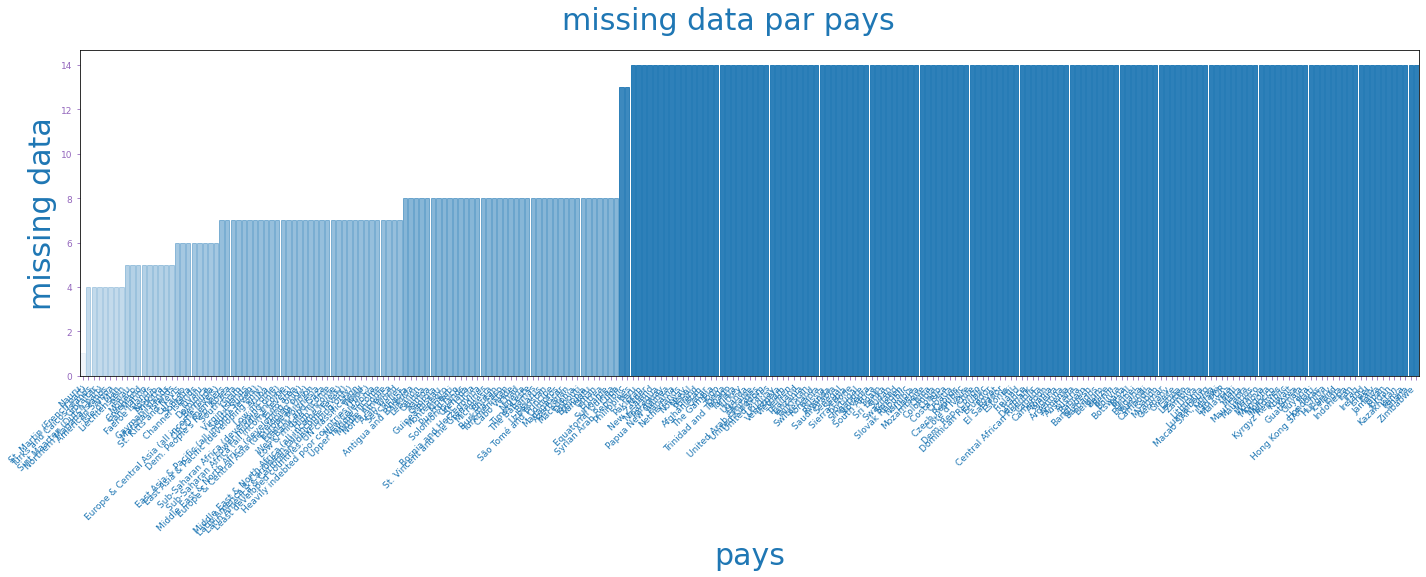

In [210]:
fig, ax = plt.subplots(1,1, figsize=(24,6))
data = CountryCode_by.sum(axis = 1).sort_values()
data.values
data.index

g = sns.barplot(x=data.index, y = data.values, ax =ax)

fig.suptitle('missing data par pays', size = 30, color = 'tab:Blue')
ax.set_xlabel('pays', size = 30, color='tab:blue')
ax.set_ylabel('missing data', size = 30, color ='tab:blue')
ax.tick_params(pad = 4, labelsize = 9,  colors ='tab:purple')

for bar in ax.patches:
    bar.set_color('tab:blue')
    alpha = bar.get_height()/15
    bar.set_alpha(alpha)

g.set_xticklabels(g.get_xticklabels(), rotation = 45, color = 'tab:blue',horizontalalignment='right' )

plt.show()

In [208]:
data.sort_values(ascending = False)

Short Name
Uganda                      14
Ukraine                     14
China                       14
Colombia                    14
Congo                       14
                            ..
St. Martin (French part)     4
Northern Mariana Islands     4
American Samoa               4
Isle of Man                  4
Nauru                        1
Length: 241, dtype: int64

In [274]:
case =[(0,0,df_Analyse_2010.columns[3]),
       (0,1,df_Analyse_2010.columns[4]),
       (0,2,df_Analyse_2010.columns[5]),
       (0,3,df_Analyse_2010.columns[6]),
       (0,4,df_Analyse_2010.columns[7]),
       (0,5,df_Analyse_2010.columns[8]),
       (1,0,df_Analyse_2010.columns[9]),
       (1,1,df_Analyse_2010.columns[10]),
       (1,2,df_Analyse_2010.columns[11]),
       (1,3,df_Analyse_2010.columns[12]),
       (1,4,df_Analyse_2010.columns[13]),
       (1,5,df_Analyse_2010.columns[14])]

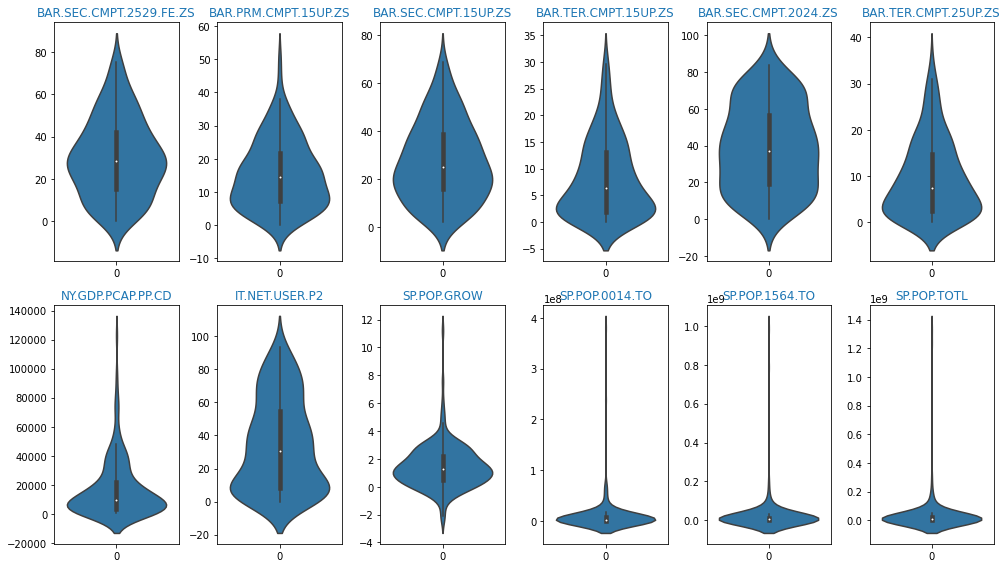

In [275]:
fig, axs = plt.subplots(2, 6, figsize=(14, 8))
for i,j,col in case:
    sns.violinplot(data = df_Analyse_2010[col], ax = axs[i,j])
    axs[i,j].set_title(col, color = 'tab:blue')
plt.tight_layout()
plt.show()

In [407]:
df_Analyse_2010[['Short Name','SP.POP.TOTL']].sort_values(by = 'SP.POP.TOTL', ascending = False)

,Short Name,SP.POP.TOTL
36,China,1.337705e+09
88,India,1.230981e+09
198,United States,3.093482e+08
86,Indonesia,2.425241e+08
26,Brazil,1.967963e+08
...,...,...
70,Gibraltar,3.318900e+04
171,San Marino,3.111000e+04
182,Turks and Caicos Islands,3.099400e+04
151,Palau,2.047000e+04


In [214]:

cond1 = df_Analyse_2010['Short Name'] != 'China'
cond2 = df_Analyse_2010['Short Name'] != 'India'
data = df_Analyse_2010[(cond1)&(cond2)]
data

,Country Code,Short Name,Income Group,BAR.SEC.CMPT.2529.FE.ZS,BAR.PRM.CMPT.15UP.ZS,BAR.SEC.CMPT.15UP.ZS,BAR.TER.CMPT.15UP.ZS,BAR.SEC.CMPT.2024.ZS,BAR.TER.CMPT.25UP.ZS,NY.GDP.PCAP.PP.CD,IT.NET.USER.P2,SP.POP.GROW,SP.POP.0014.TO,SP.POP.1564.TO,SP.POP.TOTL
0,ABW,Aruba,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,0.212680,21222.0,69987.0,1.016690e+05
1,AFG,Afghanistan,Low income,0.03,12.86,8.65,3.65,15.60,5.51,1581.600836,4.00,2.812617,13767370.0,14372378.0,2.880317e+07
2,AGO,Angola,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,5775.864013,2.80,3.570099,11055071.0,11771088.0,2.336913e+07
3,ALB,Albania,Upper middle income,42.51,9.03,42.90,0.93,55.96,0.99,9646.615727,45.00,-0.496462,654461.0,1947666.0,2.913021e+06
4,AND,Andorra,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.00,-0.015393,NaN,NaN,8.444900e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,7716.611869,NaN,0.803249,NaN,NaN,1.775680e+06
237,YEM,Yemen,Lower middle income,9.26,10.56,10.68,1.50,19.24,1.68,4388.144847,12.35,2.713034,10024199.0,12945818.0,2.360678e+07
238,ZAF,South Africa,Upper middle income,74.44,6.22,53.90,0.32,74.60,0.46,11785.605136,24.00,1.429604,15513076.0,33078665.0,5.097943e+07
239,ZMB,Zambia,Lower middle income,13.25,27.45,16.53,0.49,15.32,1.00,3212.941881,10.00,2.883152,6478323.0,7017292.0,1.385003e+07


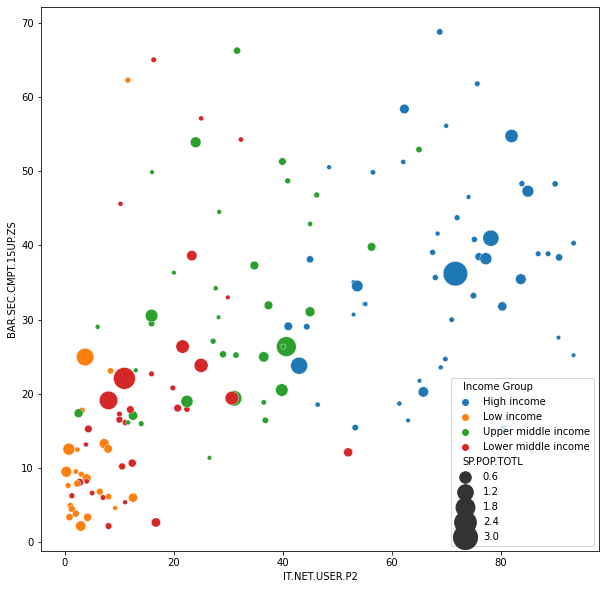

In [423]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
x = data['IT.NET.USER.P2']
y = data['BAR.SEC.CMPT.15UP.ZS']
f = data['Income Group']
z = data['SP.POP.TOTL']
g = sns.scatterplot(data= data,x=x, y=y, hue= f, size = z, sizes=(20, 600))
#sns.scatterplot(data=data, x=x, y=y ,hue=, size=, sizes=(20, 200), hue_norm=(0, 7),legend="full")




In [221]:
#zoom sur la partie qui pourrait etre un marché potentiel
cond_int_user = data['IT.NET.USER.P2']>=70
cond_SD = data['BAR.SEC.CMPT.15UP.ZS']>=40
data[cond_int_user&cond_SD][['Short Name','SP.POP.TOTL','BAR.SEC.CMPT.15UP.ZS', 'IT.NET.USER.P2',]].sort_values(by ='SP.POP.TOTL', ascending = False)

,Short Name,SP.POP.TOTL,BAR.SEC.CMPT.15UP.ZS,IT.NET.USER.P2
107,Japan,128070000.0,40.98,78.21
51,Germany,81776930.0,54.75,82.00
75,United Kingdom,62766365.0,47.31,85.00
205,Sweden,9378126.0,48.29,90.00
12,Austria,8363404.0,40.81,75.17
34,Switzerland,7824909.0,48.33,83.90
90,"Hong Kong SAR, China",7024200.0,43.74,72.00
203,Slovak Republic,5391428.0,61.79,75.71
164,Norway,4889252.0,40.30,93.39
204,Slovenia,2048583.0,56.12,70.00
